In [210]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error

In [211]:
df = pd.read_csv('data/salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [212]:
exp_level_abbr = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_level'] = df['experience_level'].map(exp_level_abbr)

comp_size_abbr = {'S': 0, 'M': 2, 'L': 2}
df['company_size'] = df['company_size'].map(comp_size_abbr)

df = df.drop(columns=['salary'])

In [213]:
job_title_keywords = set()

for job_title in df['job_title']:
    for word in job_title.strip().lower().split(' '):
        job_title_keywords.add(word)

print(job_title_keywords)
print(len(job_title_keywords))

{'analytics', 'fullstack', 'genai', 'ml', 'director', 'system', '&', 'python', 'governance', 'big', 'computational', 'scala', 'of', 'intelligence', 'finance', 'representative', 'delivery', 'people', 'integrator', 'success', 'deep', 'ai', 'frontend', 'engineer', 'modeler', 'infrastructure', 'operations', 'business', 'and', 'administrator', 'systems', 'full', 'strategy', 'azure', 'encounter', 'java', 'database', 'prompt', 'cloud', 'algorithm', 'writer', 'crm', 'clinical', 'manager', 'development', 'spark', 'pricing', 'lead', 'insights', 'enterprise', 'owner', 'programmer', 'tableau', 'solution', 'operator', 'qa', 'bioinformatics', 'vision', 'head', 'integration', 'aws', 'developer', 'fellow', 'assistant', 'quantitative', 'decision', 'controls', 'power', 'machine', 'learning', 'designer', 'advocate', 'compliance', 'site', 'reporter', 'marketing', 'account', 'insight', 'stack', 'admin', 'sas', 'reliability', 'databricks', 'principal', 'management', 'pipeline', 'team', 'technology', 'safety

In [214]:
df_synthetic = df.copy()

df_synthetic['job_title_lower'] = df_synthetic['job_title'].str.lower()

new_cols = {}

for keyword in job_title_keywords:
    col_name = f'keyword_{keyword}'
    new_cols[col_name] = df_synthetic['job_title_lower'].str.contains(keyword)

df_synthetic = pd.concat([df_synthetic, pd.DataFrame(new_cols)], axis=1)

df_synthetic = df_synthetic.drop(columns=['job_title_lower'])

df_synthetic

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,...,keyword_model,keyword_scientist,keyword_professional,keyword_analysis,keyword_financial,keyword_visualization,keyword_bi,keyword_analyst,keyword_stage,keyword_nlp
0,2025,1,FT,Customer Success Manager,EUR,60000,NL,50,NL,2,...,False,False,False,False,False,False,False,False,False,False
1,2025,2,FT,Engineer,USD,165000,US,0,US,2,...,False,False,False,False,False,False,False,False,False,False
2,2025,2,FT,Engineer,USD,109000,US,0,US,2,...,False,False,False,False,False,False,False,False,False,False
3,2025,2,FT,Applied Scientist,USD,294000,US,0,US,2,...,False,True,False,False,False,False,False,False,False,False
4,2025,2,FT,Applied Scientist,USD,137600,US,0,US,2,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,2,FT,Data Scientist,USD,412000,US,100,US,2,...,False,True,False,False,False,False,False,False,False,False
88580,2021,1,FT,Principal Data Scientist,USD,151000,US,100,US,2,...,False,True,False,False,False,False,False,False,False,False
88581,2020,0,FT,Data Scientist,USD,105000,US,100,US,0,...,False,True,False,False,False,False,False,False,False,False
88582,2020,0,CT,Business Data Analyst,USD,100000,US,100,US,2,...,False,False,False,False,False,False,False,True,False,False


In [215]:
df = pd.get_dummies(df, columns=['employment_type', 'employee_residence', 'company_location'])
df_synthetic = pd.get_dummies(df_synthetic, columns=['employment_type'])

df = df.drop(columns=['job_title', 'salary_currency'])
df_synthetic = df_synthetic.drop(columns=['job_title', 'salary_currency', 'employee_residence', 'company_location'])

print(f'df size = {len(df.columns)}')
print(f'df_synthetic size = {len(df_synthetic.columns)}')

df size = 195
df_synthetic size = 160


Mean Squared Error: 67517.64
Coefficients: [3152.5237082924646, 31708.211526779374, -139.719508292515, 579.0204155139072, 4511.057736394108, -17809.92149149541, 27195.043253551776, -13896.179498449244, -9068.94526874459, -4327.1645422217925, -57025.47021017795, -35044.47118751352, 13412.040396643522, -1412.9221454450999, 42747.56027231649, 8450.982832140866, 48334.91539220903, -37681.86676576317, 25764.390517688167, -4.001776687800884e-10, 42318.133234153174, 19080.420577029097, -2.6921043172478676e-10, 30423.158654253915, 46423.991748406035, 102091.27991683774, -3695.295775221268, -22561.96040160789, -17701.015245728293, 87872.05512332122, 17042.595203054876, 28409.894988438893, 516.096836746241, -8.731149137020111e-11, -5055.42689419758, -16867.04914458625, 20600.933975582782, 9954.657443292754, -1482.6589597410475, 20331.38523747147, 10568.10608229856, -63515.58022928365, -13221.691997981014, -850.7859448641102, 5487.365538801081, -8128.359301672814, 28135.827853275085, -57858.67148

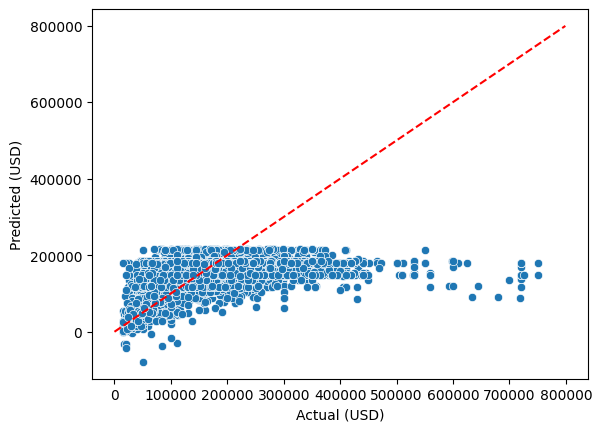

In [216]:
prediction_col = 'salary_in_usd'

X = df.drop(columns=[prediction_col])
y = df[prediction_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) ** .5

print(f"Mean Squared Error: {mse:.2f}")
print(f"Coefficients: {model.coef_.tolist()}")
print(f"Intercept: {model.intercept_}")

plot = sns.scatterplot(x=y_test, y=y_pred)
vals = range(0,800000,1000)
plt.plot(vals, vals, color='red', linestyle='--', label='y=x')
plt.xlabel('Actual (USD)')
plt.ylabel('Predicted (USD)')
plt.show()

Mean Squared Error: 64138.55
Coefficients: [2902.8098775521426, 25901.199823517443, -94.24623664455316, 23109.008471143075, -7628.906478419849, 379.60482720326036, -7417.767813197179, 49128.597108874004, 30138.952062440636, -27637.047235114438, 17251.95332618211, -21084.406458491234, 5052.697067986841, -12230.650701993323, -40832.19184516145, -30632.47189253868, 12468.523112107221, -7996.650237976975, 11596.245765627687, -38219.14154249026, 12190.400793063996, -100803.55686029031, -16954.04417839298, -44413.079146988915, -28251.713596355537, 8189.321511778857, 13978.324717662894, 11495.881686398327, -74156.09113414181, 20975.508106406676, -5621.954288692705, -12118.796309860838, 27658.37579481492, -12359.569610993756, 28449.954766665178, -1716.1106800877023, 20158.44933672726, -3149.0270384959185, -1940.2032958613272, -10397.143608578908, 17135.020417081065, 10449.325685710994, -18513.368949282463, 44861.594068864884, -1747.4399015114932, -45417.1097990645, -43187.667216598384, 6985.97

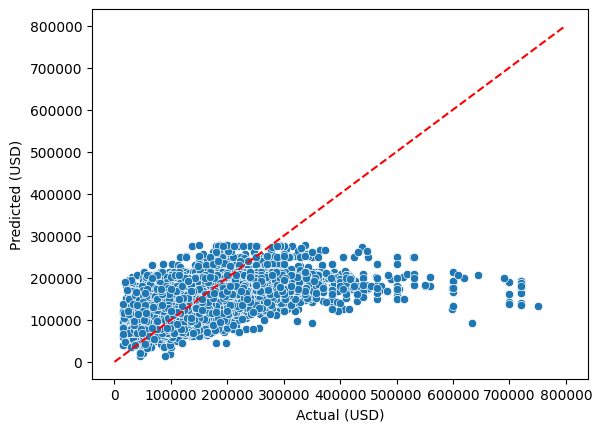

In [217]:
prediction_col = 'salary_in_usd'

X = df_synthetic.drop(columns=[prediction_col])
y = df_synthetic[prediction_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) ** .5

print(f"Mean Squared Error: {mse:.2f}")
print(f"Coefficients: {model.coef_.tolist()}")
print(f"Intercept: {model.intercept_}")

plot = sns.scatterplot(x=y_test, y=y_pred)
vals = range(0,800000,1000)
plt.plot(vals, vals, color='red', linestyle='--', label='y=x')
plt.xlabel('Actual (USD)')
plt.ylabel('Predicted (USD)')
plt.show()

In [218]:
selector = SelectKBest(score_func=f_classif, k=50)
X_new = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

c:\Users\HENSLEYAS21\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Mean Squared Error: 66713.34
work_year                2372.20
experience_level         26380.24
remote_ratio             -111.18
company_size             23360.67
keyword_genai            8132.45
keyword_director         47535.36
keyword_governance       5695.83
keyword_big              -25220.04
keyword_computational    -29097.34
keyword_scala            -46937.38
keyword_intelligence     -13248.01
keyword_finance          66323.76
keyword_deep             -75541.52
keyword_engineer         16419.15
keyword_business         -19255.18
keyword_and              30240.64
keyword_encounter        12069.95
keyword_spark            -46937.38
keyword_insights         -1003.71
keyword_programmer       -20796.77
keyword_bioinformatics   -49923.26
keyword_head             56020.95
keyword_fellow           -19013.46
keyword_assistant        -71479.19
keyword_machine          -86289.81
keyword_learning         97958.55
keyword_insight          -34023.77
keyword_sas              43539.23
keyword_da

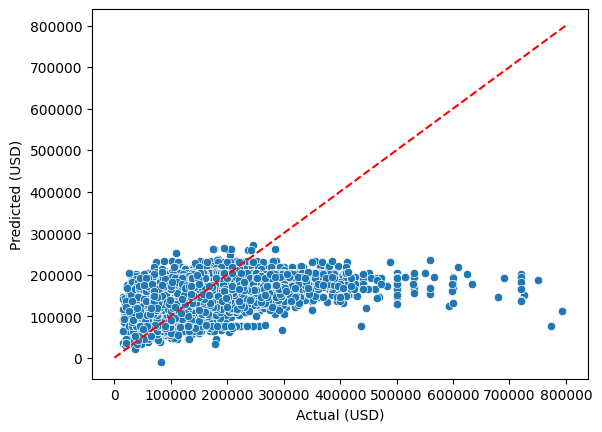

In [219]:
prediction_col = 'salary_in_usd'

X = df_synthetic[selected_columns]
y = df_synthetic[prediction_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) ** .5

print(f"Mean Squared Error: {mse:.2f}")
for i in range(len(selected_columns)):
    print(f"{selected_columns[i].ljust(24)} {model.coef_.tolist()[i]:.2f}")
#print(f"Coefficients: {model.coef_.tolist()}")
print(f"Intercept: {model.intercept_}")

plot = sns.scatterplot(x=y_test, y=y_pred)
vals = range(0,800000,1000)
plt.plot(vals, vals, color='red', linestyle='--', label='y=x')
plt.xlabel('Actual (USD)')
plt.ylabel('Predicted (USD)')
plt.show()